In [1]:
import pandas as pd
import numpy as np
import requests
import json
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [85]:
post_data = pd.read_csv("Subset_report.csv")

In [86]:
post_data = post_data.drop('Stock', 1)
post_data['Count_Score_300'] = post_data['Count_Score_300'].fillna(0)
post_data

,Unnamed: 0,created_utc,post_count,avg_comments,avg_score,Ticker,isPartial,Noise,Count_Score_300,Adj Close,Volume
0,0,12/8/2020,1,4.000000,1.000000,MSFT,False,28,0.0,215.513626,23284100.0
1,1,12/9/2020,3,2.666667,1.000000,MSFT,False,23,0.0,211.313309,32440600.0
2,2,12/10/2020,1,17.000000,1.000000,MSFT,False,29,0.0,210.036255,26733300.0
3,3,12/16/2020,5,40.800000,4.600000,MSFT,False,26,0.0,218.776123,35023300.0
4,4,12/17/2020,4,26.250000,6.250000,MSFT,False,28,0.0,218.915802,32515800.0
...,...,...,...,...,...,...,...,...,...,...,...
601,601,1/30/2021,6,0.000000,1.000000,EXPR,False,8,0.0,NaN,NaN
602,602,1/31/2021,14,0.285714,1.071429,EXPR,False,10,0.0,NaN,NaN
603,603,2/1/2021,10,0.800000,1.000000,EXPR,False,22,0.0,5.000000,28988900.0
604,604,2/2/2021,11,2.363636,2.181818,EXPR,False,20,0.0,3.380000,35425000.0


In [87]:
apple = pd.read_csv("AAPL-CombinedDF_2020-03-05_2021-03-04.csv")
amc = pd.read_csv("AMC-CombinedDF_2020-03-05_2021-03-04.csv")
gme = pd.read_csv("GME-CombinedDF_2020-03-05_2021-03-04.csv")
google = pd.read_csv("GOOG-CombinedDF_2020-03-05_2021-03-04.csv")
microsoft = pd.read_csv("MSFT-CombinedDF_2020-03-05_2021-03-04.csv")

In [88]:
ticker_list = ['MSFT','TSLA','AMZN','AAPL','JPM','CRM','ZM','PTON','DIS','MCD','PRTY','CSCO','GOOGL','ORCL','GME','AMC','BB','NOK','BBBY','BBY','KOSS','EXPR']

In [89]:
MSFT_df = post_data.loc[post_data.Ticker=='MSFT']
TSLA_df = post_data.loc[post_data.Ticker=='TSLA']
AMZN_df = post_data.loc[post_data.Ticker=='AMZN']
AAPL_df = post_data.loc[post_data.Ticker=='AAPL']
JPM_df = post_data.loc[post_data.Ticker=='JPM']
CRM_df = post_data.loc[post_data.Ticker=='CRM']
ZM_df = post_data.loc[post_data.Ticker=='ZM']
PTON_df = post_data.loc[post_data.Ticker=='PTON']
DIS_df = post_data.loc[post_data.Ticker=='DIS']
MCD_df = post_data.loc[post_data.Ticker=='MCD']
PRTY_df = post_data.loc[post_data.Ticker=='PRTY']
CSCO_df = post_data.loc[post_data.Ticker=='CSCO']
GOOGL_df = post_data.loc[post_data.Ticker=='GOOGL']
ORCL_df = post_data.loc[post_data.Ticker=='ORCL']
GME_df = post_data.loc[post_data.Ticker=='GME']
AMC_df = post_data.loc[post_data.Ticker=='AMC']
BB_df = post_data.loc[post_data.Ticker=='BB']
NOK_df = post_data.loc[post_data.Ticker=='NOK']
BBBY_df = post_data.loc[post_data.Ticker=='BBBY']
BBY_df = post_data.loc[post_data.Ticker=='BBY']
KOSS_df = post_data.loc[post_data.Ticker=='KOSS']
EXPR_df = post_data.loc[post_data.Ticker=='EXPR']

In [90]:
MSFT_df['post_count_change'] = MSFT_df['post_count'].pct_change()
TSLA_df['post_count_change'] = TSLA_df['post_count'].pct_change()
AMZN_df['post_count_change'] = AMZN_df['post_count'].pct_change()
AAPL_df['post_count_change'] = AAPL_df['post_count'].pct_change()
JPM_df['post_count_change'] = JPM_df['post_count'].pct_change()
CRM_df['post_count_change'] = CRM_df['post_count'].pct_change()
ZM_df['post_count_change'] = ZM_df['post_count'].pct_change()
PTON_df['post_count_change'] = PTON_df['post_count'].pct_change()
DIS_df['post_count_change'] = DIS_df['post_count'].pct_change()
MCD_df['post_count_change'] = MCD_df['post_count'].pct_change()
PRTY_df['post_count_change'] = PRTY_df['post_count'].pct_change()
CSCO_df['post_count_change'] = CSCO_df['post_count'].pct_change()
GOOGL_df['post_count_change'] = GOOGL_df['post_count'].pct_change()
ORCL_df['post_count_change'] = ORCL_df['post_count'].pct_change()
GME_df['post_count_change'] = GME_df['post_count'].pct_change()
AMC_df['post_count_change'] = AMC_df['post_count'].pct_change()
BB_df['post_count_change'] = BB_df['post_count'].pct_change()
NOK_df['post_count_change'] = NOK_df['post_count'].pct_change()
BBBY_df['post_count_change'] = BBBY_df['post_count'].pct_change()
BBY_df['post_count_change'] = BBY_df['post_count'].pct_change()
KOSS_df['post_count_change'] = KOSS_df['post_count'].pct_change()
EXPR_df['post_count_change'] = EXPR_df['post_count'].pct_change()

MSFT_df['avg_score_change'] = MSFT_df['avg_score'].pct_change()
TSLA_df['avg_score_change'] = TSLA_df['avg_score'].pct_change()
AMZN_df['avg_score_change'] = AMZN_df['avg_score'].pct_change()
AAPL_df['avg_score_change'] = AAPL_df['avg_score'].pct_change()
JPM_df['avg_score_change'] = JPM_df['avg_score'].pct_change()
CRM_df['avg_score_change'] = CRM_df['avg_score'].pct_change()
ZM_df['avg_score_change'] = ZM_df['avg_score'].pct_change()
PTON_df['avg_score_change'] = PTON_df['avg_score'].pct_change()
DIS_df['avg_score_change'] = DIS_df['avg_score'].pct_change()
MCD_df['avg_score_change'] = MCD_df['avg_score'].pct_change()
PRTY_df['avg_score_change'] = PRTY_df['avg_score'].pct_change()
CSCO_df['avg_score_change'] = CSCO_df['avg_score'].pct_change()
GOOGL_df['avg_score_change'] = GOOGL_df['avg_score'].pct_change()
ORCL_df['avg_score_change'] = ORCL_df['avg_score'].pct_change()
GME_df['avg_score_change'] = GME_df['avg_score'].pct_change()
AMC_df['avg_score_change'] = AMC_df['avg_score'].pct_change()
BB_df['avg_score_change'] = BB_df['avg_score'].pct_change()
NOK_df['avg_score_change'] = NOK_df['avg_score'].pct_change()
BBBY_df['avg_score_change'] = BBBY_df['avg_score'].pct_change()
BBY_df['avg_score_change'] = BBY_df['avg_score'].pct_change()
KOSS_df['avg_score_change'] = KOSS_df['avg_score'].pct_change()
EXPR_df['avg_score_change'] = EXPR_df['avg_score'].pct_change()

MSFT_df['Adj Close_change'] = MSFT_df['Adj Close'].pct_change()
TSLA_df['Adj Close_change'] = TSLA_df['Adj Close'].pct_change()
AMZN_df['Adj Close_change'] = AMZN_df['Adj Close'].pct_change()
AAPL_df['Adj Close_change'] = AAPL_df['Adj Close'].pct_change()
JPM_df['Adj Close_change'] = JPM_df['Adj Close'].pct_change()
CRM_df['Adj Close_change'] = CRM_df['Adj Close'].pct_change()
ZM_df['Adj Close_change'] = ZM_df['Adj Close'].pct_change()
PTON_df['Adj Close_change'] = PTON_df['Adj Close'].pct_change()
DIS_df['Adj Close_change'] = DIS_df['Adj Close'].pct_change()
MCD_df['Adj Close_change'] = MCD_df['Adj Close'].pct_change()
PRTY_df['Adj Close_change'] = PRTY_df['Adj Close'].pct_change()
CSCO_df['Adj Close_change'] = CSCO_df['Adj Close'].pct_change()
GOOGL_df['Adj Close_change'] = GOOGL_df['Adj Close'].pct_change()
ORCL_df['Adj Close_change'] = ORCL_df['Adj Close'].pct_change()
GME_df['Adj Close_change'] = GME_df['Adj Close'].pct_change()
AMC_df['Adj Close_change'] = AMC_df['Adj Close'].pct_change()
BB_df['Adj Close_change'] = BB_df['Adj Close'].pct_change()
NOK_df['Adj Close_change'] = NOK_df['Adj Close'].pct_change()
BBBY_df['Adj Close_change'] = BBBY_df['Adj Close'].pct_change()
BBY_df['Adj Close_change'] = BBY_df['Adj Close'].pct_change()
KOSS_df['Adj Close_change'] = KOSS_df['Adj Close'].pct_change()
EXPR_df['Adj Close_change'] = EXPR_df['Adj Close'].pct_change()

MSFT_df['Volume_change'] = MSFT_df['Volume'].pct_change()
TSLA_df['Volume_change'] = TSLA_df['Volume'].pct_change()
AMZN_df['Volume_change'] = AMZN_df['Volume'].pct_change()
AAPL_df['Volume_change'] = AAPL_df['Volume'].pct_change()
JPM_df['Volume_change'] = JPM_df['Volume'].pct_change()
CRM_df['Volume_change'] = CRM_df['Volume'].pct_change()
ZM_df['Volume_change'] = ZM_df['Volume'].pct_change()
PTON_df['Volume_change'] = PTON_df['Volume'].pct_change()
DIS_df['Volume_change'] = DIS_df['Volume'].pct_change()
MCD_df['Volume_change'] = MCD_df['Volume'].pct_change()
PRTY_df['Volume_change'] = PRTY_df['Volume'].pct_change()
CSCO_df['Volume_change'] = CSCO_df['Volume'].pct_change()
GOOGL_df['Volume_change'] = GOOGL_df['Volume'].pct_change()
ORCL_df['Volume_change'] = ORCL_df['Volume'].pct_change()
GME_df['Volume_change'] = GME_df['Volume'].pct_change()
AMC_df['Volume_change'] = AMC_df['Volume'].pct_change()
BB_df['Volume_change'] = BB_df['Volume'].pct_change()
NOK_df['Volume_change'] = NOK_df['Volume'].pct_change()
BBBY_df['Volume_change'] = BBBY_df['Volume'].pct_change()
BBY_df['Volume_change'] = BBY_df['Volume'].pct_change()
KOSS_df['Volume_change'] = KOSS_df['Volume'].pct_change()
EXPR_df['Volume_change'] = EXPR_df['Volume'].pct_change()

MSFT_df = MSFT_df.dropna()
TSLA_df = TSLA_df.dropna()
AMZN_df = AMZN_df.dropna()
AAPL_df = AAPL_df.dropna()
JPM_df = JPM_df.dropna()
CRM_df = CRM_df.dropna()
ZM_df = ZM_df.dropna()
PTON_df = PTON_df.dropna()
DIS_df = DIS_df.dropna()
MCD_df = MCD_df.dropna()
PRTY_df = PRTY_df.dropna()
CSCO_df = CSCO_df.dropna()
GOOGL_df = GOOGL_df.dropna()
ORCL_df = ORCL_df.dropna()
GME_df = GME_df.dropna()
AMC_df = AMC_df.dropna()
BB_df = BB_df.dropna()
NOK_df = NOK_df.dropna()
BBBY_df = BBBY_df.dropna()
BBY_df = BBY_df.dropna()
KOSS_df = KOSS_df.dropna()
EXPR_df = EXPR_df.dropna()


<ipython-input-90-913c70c717f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSFT_df['post_count_change'] = MSFT_df['post_count'].pct_change()
<ipython-input-90-913c70c717f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TSLA_df['post_count_change'] = TSLA_df['post_count'].pct_change()
<ipython-input-90-913c70c717f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [110]:
post_data = pd.concat([MSFT_df, TSLA_df, AMZN_df, AAPL_df, JPM_df, CRM_df, ZM_df, PTON_df, DIS_df, MCD_df, PRTY_df, CSCO_df, GOOGL_df, ORCL_df, GME_df, AMC_df, BB_df, NOK_df, BBBY_df, BBY_df, KOSS_df, EXPR_df])

In [111]:
post_data

,Unnamed: 0,created_utc,post_count,avg_comments,avg_score,Ticker,isPartial,Noise,Count_Score_300,Adj Close,Volume,post_count_change,avg_score_change,Adj Close_change,Volume_change
1,1,12/9/2020,3,2.666667,1.000000,MSFT,False,23,0.0,211.313309,32440600.0,2.000000,0.000000,-0.019490,0.393251
2,2,12/10/2020,1,17.000000,1.000000,MSFT,False,29,0.0,210.036255,26733300.0,-0.666667,0.000000,-0.006043,-0.175931
3,3,12/16/2020,5,40.800000,4.600000,MSFT,False,26,0.0,218.776123,35023300.0,4.000000,3.600000,0.041611,0.310100
4,4,12/17/2020,4,26.250000,6.250000,MSFT,False,28,0.0,218.915802,32515800.0,-0.200000,0.358696,0.000638,-0.071595
6,6,12/21/2020,2,12.500000,1.000000,MSFT,False,35,0.0,222.078507,37181900.0,1.000000,0.000000,0.014447,0.143503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,599,1/28/2021,85,7.341176,1.682353,EXPR,False,85,0.0,4.700000,89189400.0,-0.417808,0.259608,-0.507853,-0.689859
600,600,1/29/2021,19,0.368421,1.000000,EXPR,False,45,0.0,6.000000,57441800.0,-0.776471,-0.405594,0.276596,-0.355957
603,603,2/1/2021,10,0.800000,1.000000,EXPR,False,22,0.0,5.000000,28988900.0,-0.285714,-0.066667,-0.166667,-0.495334
604,604,2/2/2021,11,2.363636,2.181818,EXPR,False,20,0.0,3.380000,35425000.0,0.100000,1.181818,-0.324000,0.222019


In [112]:
post_data.replace([np.inf, -np.inf], np.nan, inplace=True)
post_data.replace([np.inf, -np.inf], np.nan).dropna(subset=['post_count_change', 'avg_score_change', 'Volume_change'], how="all")
post_data = post_data.dropna()

In [4]:
post_data

NameError: name 'post_data' is not defined

In [114]:
post_data.to_csv("main_data.csv")

In [134]:
X = post_data[['post_count_change', 'avg_score_change', 'Volume_change', 'Count_Score_300']]
y = post_data['Adj Close_change'].values.reshape(-1, 1)

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [136]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [137]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

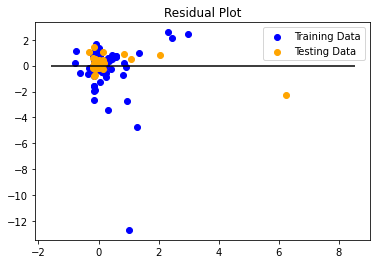

In [138]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [139]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.15319122649933242, R2: 0.8150623337916859
